In [29]:
import numpy as np
import pandas as pd

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from numpy import ravel # For matrices
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import RandomizedSearchCV
from pandas import DataFrame
import joblib

In [8]:
df =sns.load_dataset('titanic')

In [550]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.00,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.00,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
# Removing IDs
df.drop(columns=['alive'],inplace=True)

In [552]:
# Nulls in dataset
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [553]:
#Only columns that have nulls
df.columns[df.isnull().sum()>1]

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')

In [9]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['survived']), #removing prediction colum from X_train/test
                                                 df['survived'], #Adding prediction column back to y_train/test
                                                 test_size=0.2,
                                                random_state=42)

In [591]:
numeric_features = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

categorical_features = ["embarked", "sex", "pclass",'embark_town']
categorical_transformer = Pipeline(
    steps=[
        ("categorical_imputer", SimpleImputer(strategy='constant',fill_value='UNKNOWN')),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)



preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [586]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['age', 'fare']),
                                ('cat',
                                 Pipeline(steps=[('categorical_imputer',
                                                  SimpleImputer(fill_value='UNKNOWN',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('selector',
                                                  SelectPercentile(percentile=50,
                                                                   score_func=<function chi2 at 0x7fba819a39a0>))]),
                                 ['embarked', 'sex', 'pclass', 'embark_town'])])

In [592]:
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())]
)

In [635]:
pipeline.fit(X_train, y_train)
print("model score: %.3f" % pipeline.score(X_test, y_test))

model score: 0.788


In [594]:
pipeline.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', MinMaxScaler())]),
                                  ['age', 'fare']),
                                 ('cat',
                                  Pipeline(steps=[('categorical_imputer',
                                                   SimpleImputer(fill_value='UNKNOWN',
                                                                 strategy='constant')),
                                                  ('encoder',
                                                   OneHotEncoder(handle_unknown='ignore')),
                                                  ('selector',
                                                   SelectPercentile(percentile=50,
                                                                    score

In [595]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7879936964444006

In [604]:
#Grid Search (Hyperparameter tuning)
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__cat__selector__percentile": [10, 30, 50, 70], 
    "classifier__max_depth": [1, 5, 10, 100],
    "classifier__n_estimators": [1, 10, 100, 1000]
}

search_cv = RandomizedSearchCV(pipeline, param_grid, n_iter=10, random_state=0)

In [605]:
search_cv.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['age',
                                                                                'fare']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('categorical_imputer',
                                                                                                SimpleImputer(fill_value='UNKNOWN',
                                                                                                              strategy='constant')),
                                                                                               ('encoder',
                                                                                                OneHotEncoder(handle_unknown='i...
                                                                                                                 score_func=<function chi2 at 0x7fba819a39a0>))]),
                                                                               ['embarked',
                                                                                'sex',
                                                                                'pclass',
                                                                                'embark_town'])])),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   param_distributions={'classifier__max_depth': [1, 5, 10,
                                                                  100],
                                        'classifier__n_estimators': [1, 10, 100,
                                                                     1000],
                                        'preprocessor__cat__selector__percentile': [10,
                                                                                    30,
                                                                                    50,
                                                                                    70],
                                        'preprocessor__num__imputer__strategy': ['mean',
                                                                                 'median']},
                   random_state=0)

In [603]:
print("Best params:")
print(search_cv.best_params_)

Best params:
{'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__selector__percentile': 30, 'classifier__n_estimators': 100, 'classifier__max_depth': 5}


In [644]:
# Stores the optimum model in best_pipe (This needs to be picked for scorings)
best_pipe = search_cv.best_estimator_
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(fill_value='UNKNOWN',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=30,
                                                                                    score_func=<function chi2 at 0x7fba819a39a0>))]),
                                                  ['embarked', 'sex', 'pclass',
                                                   'embark_town'])])),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [612]:
result_df = DataFrame.from_dict(search_cv.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_preprocessor__num__imputer__strategy',
       'param_preprocessor__cat__selector__percentile',
       'param_classifier__n_estimators', 'param_classifier__max_depth',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


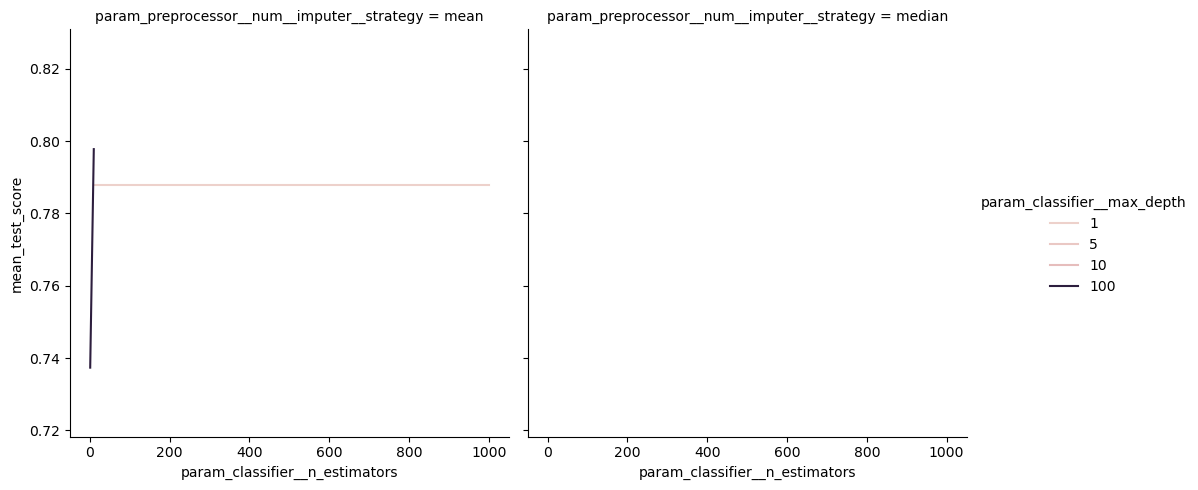

In [628]:
sns.relplot(data=result_df,
kind='line',
x='param_classifier__n_estimators',
y='mean_test_score',
hue='param_classifier__max_depth',
col='param_preprocessor__num__imputer__strategy')


In [645]:
import pickle
pickle.dump(best_pipe,open('best_pipe.pkl','wb'))

In [646]:
X_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
709,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,False
439,2,male,31.00,0,0,10.5000,S,Second,man,True,NaN,Southampton,True
840,3,male,20.00,0,0,7.9250,S,Third,man,True,NaN,Southampton,True
720,2,female,6.00,0,1,33.0000,S,Second,child,False,NaN,Southampton,False
39,3,female,14.00,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,False
290,1,female,26.00,0,0,78.8500,S,First,woman,False,NaN,Southampton,True
300,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,True
333,3,male,16.00,2,0,18.0000,S,Third,man,True,NaN,Southampton,False
208,3,female,16.00,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,True
136,1,female,19.00,0,2,26.2833,S,First,woman,False,D,Southampton,False


In [1]:
import joblib
same_pipeline = joblib.load('best_pipe.pkl')

In [2]:
same_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(fill_value='UNKNOWN',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=30,
                                                                                    score_func=<function chi2 at 0x7faa21d0fe20>))]),
                                                  ['embarked', 'sex', 'pclass',
                                                   'embark_town'])])),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [10]:
same_pipeline.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])